In [1]:
## Imputing Missing Values 

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
# reading dataset
data = pd.read_csv("titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Checking shape
data.shape

(891, 12)

In [6]:
# Checking Missing Values
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Making a dataset having feature with missing value only

In [8]:
df = data[["Age", "Cabin", "Embarked", "Survived"]]
df.head()

,Age,Cabin,Embarked,Survived
0,22.0,NaN,S,0
1,38.0,C85,C,1
2,26.0,NaN,S,1
3,35.0,C123,S,1
4,35.0,NaN,S,0


In [9]:
# copy dataset
df_copy = df.copy()

In [10]:
#Numerical Cloumns
df["Age"].isnull().sum()

177

In [11]:
df["Age"].isnull().sum() * 100 / df["Age"].shape[0]

19.865319865319865

## Handaling Numerical Data

In [12]:
# Using mean and median

In [13]:
df["Age"].mean(), df["Age"].median()

(29.69911764705882, 28.0)

In [14]:
df["imputed_age_mean"] = df["Age"].fillna(df["Age"].mean())
df["imputed_age_median"] = df["Age"].fillna(df["Age"].median())

In [15]:
df.head()

,Age,Cabin,Embarked,Survived,imputed_age_mean,imputed_age_median
0,22.0,NaN,S,0,22.0,22.0
1,38.0,C85,C,1,38.0,38.0
2,26.0,NaN,S,1,26.0,26.0
3,35.0,C123,S,1,35.0,35.0
4,35.0,NaN,S,0,35.0,35.0


In [16]:
# After imputing checking for variance
print("Before Imputing, Variance:", df["Age"].var())
print("After Imputing [Mean] Variance: ", df["imputed_age_mean"].var())
print("After Imputing [Median] Variance: ", df["imputed_age_median"].var())

Before Imputing, Variance: 211.01912474630802
After Imputing [Mean] Variance:  169.0523999372108
After Imputing [Median] Variance:  169.51249827942345


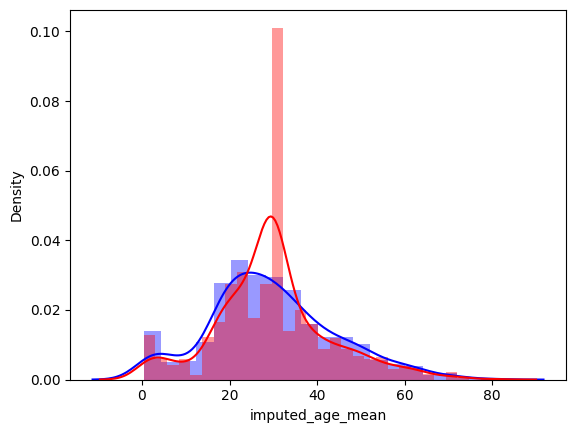

In [17]:
# ALso analysing change in distribution
sns.distplot(df["Age"], color='blue')
sns.distplot(df["imputed_age_mean"], color='red')
plt.show()

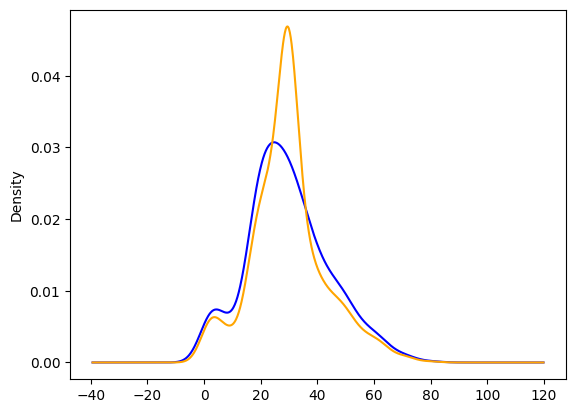

In [18]:
# Just ked plot
df["Age"].plot(kind="kde", color='blue')
df["imputed_age_mean"].plot(kind="kde", color='orange')
plt.show()

In [20]:
# using sklearn Simple imputer

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [26]:
y = df_copy["Survived"]
X = df_copy.drop(["Survived"], axis=1)

In [27]:
X.shape, y.shape

((891, 3), (891,))

In [ ]:
# train test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [31]:
# Building two different imputer for mean and median

In [34]:
mean_imputer = SimpleImputer(strategy="mean")
median_imputer = SimpleImputer(strategy="median")

In [35]:
mean_imputer, median_imputer

(SimpleImputer(), SimpleImputer(strategy='median'))

In [47]:
mean_imputed_age = mean_imputer.fit(np.asarray(X["Age"]).reshape(-1,1))

In [48]:
median_imputed_age = median_imputer.fit(np.asarray(X["Age"]).reshape(-1,1))

In [50]:
mean_imputed_age.statistics_

array([29.69911765])

In [51]:
median_imputed_age.statistics_

array([28.])

## Handaling Categorical Missing Values

In [54]:
missing_value_category = ["Cabin", "Embarked"]

In [58]:
for feature in missing_value_category:
    print(f"{feature}:",df_copy[feature].isnull().sum())
    print(f"{feature}:",df_copy[feature].isnull().sum() * 100 / df[feature].shape[0])
    print("-"*50)

Cabin: 687
Cabin: 77.10437710437711
--------------------------------------------------
Embarked: 2
Embarked: 0.2244668911335578
--------------------------------------------------


In [59]:
## Using Mode 
## -- Most frequent Category

<AxesSubplot: >

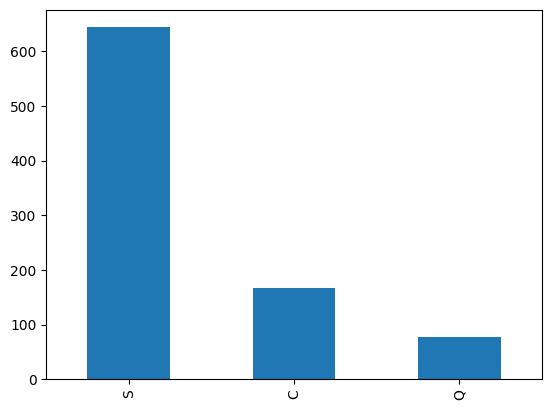

In [62]:
df["Embarked"].value_counts().plot(kind='bar')

In [63]:
embarked_mode = df["Embarked"].mode()

In [65]:
# filling
embarked_filled = df["Embarked"].fillna(embarked_mode)

In [66]:
# Checking distribution after filling with mode

<AxesSubplot: >

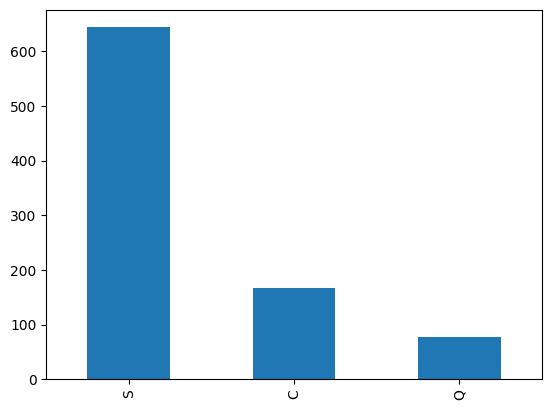

In [67]:
embarked_filled.value_counts().plot(kind='bar')

In [68]:
# Filling with new category

<AxesSubplot: >

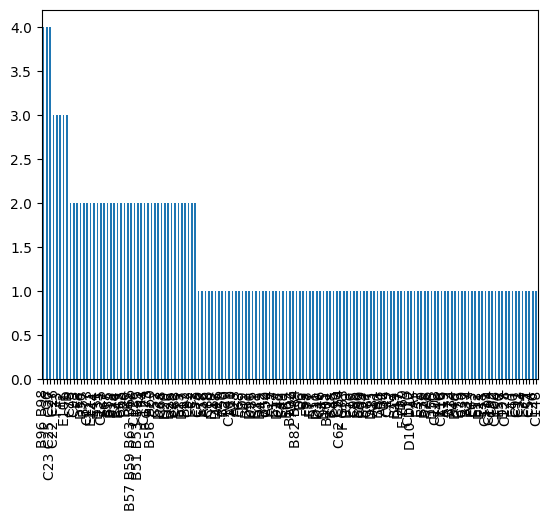

In [61]:
df["Cabin"].value_counts().plot(kind='bar')

In [69]:
cabin_filled = df["Cabin"].fillna("Missing")

In [74]:
cabin_filled.value_counts().sort_values(ascending=False)

Missing        687
G6               4
B96 B98          4
C23 C25 C27      4
F33              3
              ... 
C95              1
B101             1
B3               1
E77              1
C148             1
Name: Cabin, Length: 148, dtype: int64